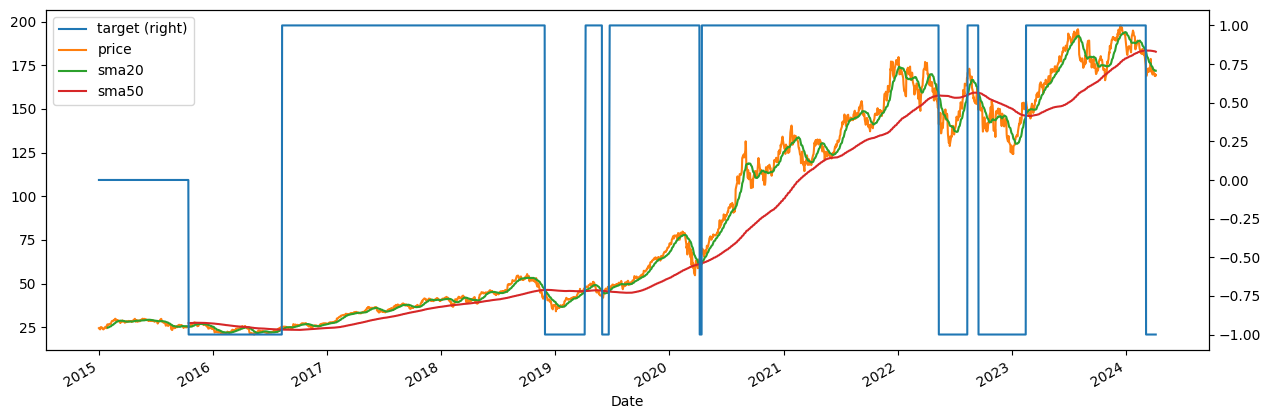

In [7]:
import bt
import pandas

data = bt.get('aapl', start='2015-01-01')
sma20 = data.rolling(20).mean()
sma200 = data.rolling(200).mean()

target = sma200.copy()
target[sma20 > sma200] = 1.0
target[sma20 <= sma200] = -1.0

target[sma200.isnull()] = 0.0

plot_data = bt.merge(target, data, sma20, sma200)
plot_data.columns = ['target', 'price', 'sma20', 'sma50']
plot = plot_data.plot(figsize=(15,5), secondary_y=['target'])


In [73]:
class WeightSignal(bt.Algo):
    def __init__(self, signal):
        self.signal = signal

    def __call__(self, target):
        if target.now in self.signal.index:
            weights = self.signal.loc[target.now]

            target.temp['weights'] = weights.dropna()

        return True

Number of trades: 509
Stat                 20>50crossover
-------------------  ----------------
Start                2015-01-01
End                  2024-04-05
Risk-free rate       0.00%

Total Return         83.73%
Daily Sharpe         0.38
Daily Sortino        0.61
CAGR                 6.79%
Max Drawdown         -52.74%
Calmar Ratio         0.13

MTD                  1.10%
3m                   -6.02%
6m                   -2.52%
YTD                  -11.56%
1Y                   4.40%
3Y (ann.)            -6.88%
5Y (ann.)            5.18%
10Y (ann.)           6.79%
Since Incep. (ann.)  6.79%

Daily Sharpe         0.38
Daily Sortino        0.61
Daily Mean (ann.)    10.44%
Daily Vol (ann.)     27.78%
Daily Skew           -0.01
Daily Kurt           6.29
Best Day             11.98%
Worst Day            -12.86%

Monthly Sharpe       0.37
Monthly Sortino      0.69
Monthly Mean (ann.)  10.65%
Monthly Vol (ann.)   28.70%
Monthly Skew         0.06
Monthly Kurt         -0.51
Best Month          

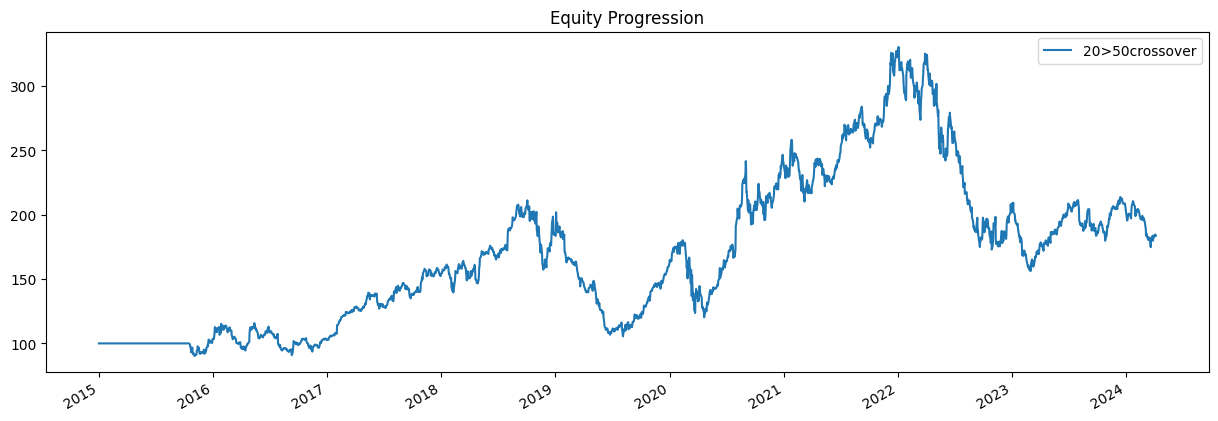

In [74]:
s = bt.Strategy('20>200 sma crossover', [WeightSignal(target),
                               bt.algos.Rebalance()])

t = bt.Backtest(s, data)

res = bt.run(t)
transactions = res.get_transactions()
print(f"Number of trades: {len(transactions)}")

res.plot()
res.display()
